In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/jstark/Desktop/TUD_classes/BNM/Exercise/Exercise_10_RungeKutta_Butcher_AdaptiveStepSize')
import RK_solvers

In [2]:
def adams_bashforth(y, n, h, f):
    # Return the solution to for the next time step n+1
    return y[n] + h/12 * (23 * f(y[n]) - 16 * f(y[n-1]) + 5 * f(y[n-2]))

def multi_stepper(initial_tp, integrationMethod, h, t0, tf, f):
    # The array/list initial_tp must contain the r initial solutions
    if len(np.shape(initial_tp)) > 1:
        r, m = np.shape(initial_tp)
    else:
        m = 1
        r = len(initial_tp)
    # Number of time steps to be computed
    N = round((tf-t0) / h)
    time = np.arange(t0, N*h, h)
    # Initialize empty array for the N solutions
    y = np.zeros([N, m])
    # Copy the r initial values to the solution array
    for i in range(r):
        y[i] = initial_tp[i]
    for n in range(r-1, N-1):
        y[n+1] = integrationMethod(y, n, h, f)
    return time, y

In [3]:
def predator_prey_model(X):
    # b: birth-rate of prey, d: death-rate of predator, c: contact-rate predator prey
    b = 1; d = 10; c = 1;
    # x1: prey concentration, x2: predator concentration
    x1 = X[0]; x2 = X[1];
    # System of ODE acc. to predator-prey model
    dx1 =  b*x1 - c*x1*x2
    dx2 = -d*x2 + c*x1*x2
    # return change in the concentrations of prey and predator 
    return np.array([dx1, dx2])

In [4]:
h = 0.01
t0 = 0
tf = 10
starting_values = np.array([[0.5, 1.0], [0.50023020652423, 0.90937363770619], [0.50089337004375, 0.82696413439848]])

In [5]:
time, y = multi_stepper(starting_values, adams_bashforth, h, t0, tf, predator_prey_model)

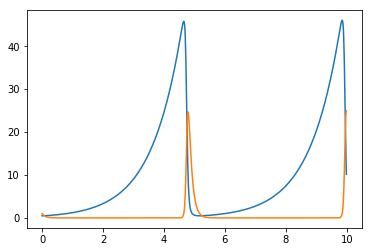

In [6]:
plt.plot(time, y)
None

# Testing the multistepper with some ODE with known analytical solution

In [7]:
def test_func(y):
    return -1 * y
    

def test_sol(y0, t):
    return y0 * np.exp(-1 * t)

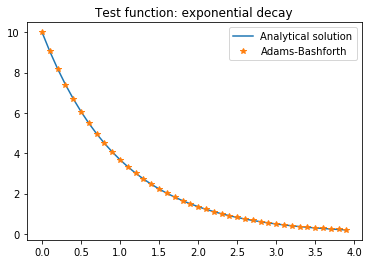

In [8]:
# Initial values
y0 = np.array([10])

# Parameters
t0 = 0
tf = 4
h  = 0.1


N  = round((tf-t0) / h) 
time = np.arange(t0, N*h, h)

test_solution= test_sol(y0, time)

r = 3
test_initial_values = [test_solution[i] for i in range(r)]

time, test_y = multi_stepper(test_initial_values, adams_bashforth, h, t0, tf, test_func)

plt.plot(time, test_solution)
plt.plot(time, test_y[:, 0], "*")
plt.legend(["Analytical solution", "Adams-Bashforth"])
plt.title("Test function: exponential decay")
None

# Compare predator-prey with RK4 approximation

In [9]:
def predator_prey_model_time(t, X):
    # b: birth-rate of prey, d: death-rate of predator, c: contact-rate predator prey
    b = 1; d = 10; c = 1;
    # x1: prey concentration, x2: predator concentration
    x1 = X[0]; x2 = X[1];
    # System of ODE acc. to predator-prey model
    dx1 =  b*x1 - c*x1*x2
    dx2 = -d*x2 + c*x1*x2
    # return change in the concentrations of prey and predator 
    return np.array([dx1, dx2])

In [10]:
A_RK4=np.array([[0,0,0],[0.5,0,0],[0,0.5,0],[0,0,1]])
b_RK4=np.array([1/6.,1/3.,1/3.,1/6.])
c_RK4=np.array([0,1/2.,1/2.,1])

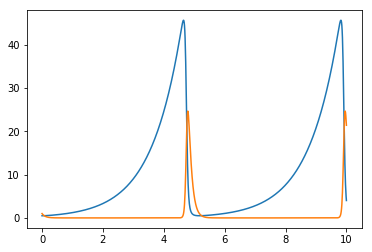

In [11]:
h = 0.01
t0 = 0
tf = 10
starting_values = np.array([[0.5, 1.0], [0.50023020652423, 0.90937363770619], [0.50089337004375, 0.82696413439848]])

time, y_all_timesteps = RK_solvers.rk_time_stepper(starting_values[0], A_RK4, b_RK4, c_RK4, h, t0, tf, predator_prey_model_time)
plt.plot(time, y_all_timesteps)
None
